# Введение в библиотеку Pandas

**Pandas** - это библиотека, которая предоставляет гибкие и удобные инструменты для анализа и обработки данных. Библиотека базируется на структурах данных, называемых **DataFrame**, которые представляют собой таблицы с метками строк и столбцов.

Основные операции, которые можно выполнять с помощью Pandas для анализа данных:



1.   **Загрузка данных**: Pandas позволяет загружать данные из различных источников, таких как CSV-файлы, базы данных или веб-сайты.
2.   **Очистка данных**: Pandas предоставляет функции для обработки отсутствующих данных, удаления дубликатов, изменения типов данных и других операций для очистки наборов данных.
3. **Индексация и выборка**: Pandas позволяет выполнять операции индексации и выборки для получения нужных столбцов и строк из DataFrame.
4. **Фильтрация данных**: Pandas позволяет применять фильтры к данным на основе заданных условий.
5. **Агрегирование данных**: Pandas предоставляет функции для группировки и агрегирования данных, что позволяет суммировать, усреднять или выполнять другие операции над группами данных.
6. **Визуализация данных**: Pandas интегрируется с библиотеками визуализации, такими как Matplotlib и Seaborn, что позволяет строить различные графики и диаграммы для анализа данных.
7. **Сохранение данных**: Pandas позволяет сохранять измененные или анализированные данные в различных форматах, таких как CSV, Excel, SQL-базы данных и другие.

Ссылка на документацию - крайне рекомендую посматривать по ходу изучения блокнота - https://pandas.pydata.org/docs/

In [96]:
import numpy as np
import pandas as pd

## Cтруктуры хранения данных в Pandas. DataFrame и Series

**Series** – это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.

**DataFrame** — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.

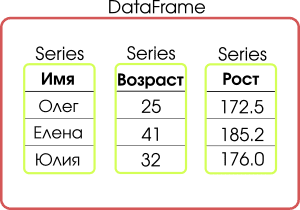

### Series

**Series** представляет собой одномерную структуру, которую для себя можно представить как таблицу с одной строкой

Создать структуру **Series** можно на базе различных типов данных:
1. словари Python;
2. списки Python;
3. массивы из numpy: ndarray;
4. скалярные величины.

**pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)**


*   data – массив, словарь или скалярное значение, на базе которого будет построен Series;
*   index – список меток, который будет использоваться для доступа к элементам Series. Длина списка должна быть равна длине data;
*   dtype – объект numpy.dtype, определяющий тип данных;
*   copy – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

In [97]:
# создание Series из списка Python
s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [98]:
# создание Series из списка Python
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print(s2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [99]:
# создание Series из ndarray массива из numpy
ndarr = np.array([1, 2, 3, 4, 5])
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
print(s3)


a    1
b    2
c    3
d    4
e    5
dtype: int64


In [100]:
#создание Series из словаря (dict)
d = {'a':1, 'b':2, 'c':3}
s4 = pd.Series(d)
print(s4)

a    1
b    2
c    3
dtype: int64


In [101]:
# обращение к элементу Series по численному индексу
s5 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
s5[3]

4

In [102]:
# обращение к элементу Series по метке
s5['d']

4

In [103]:
#получение среза
s5[:3]

a    1
b    2
c    3
dtype: int64

In [104]:
# условное выражение в индексе
s5[s5 <= 3]

a    1
b    2
c    3
dtype: int64

In [105]:
# со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.
s6 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])

In [106]:
s5 + s6

a    11
b    22
c    33
d    44
e    55
dtype: int64

In [107]:
s6*3

a     30
b     60
c     90
d    120
e    150
dtype: int64

### DataFrame

**DataFrame** – это уже двумерная структура – полноценная таблица с множеством строк и столбцов

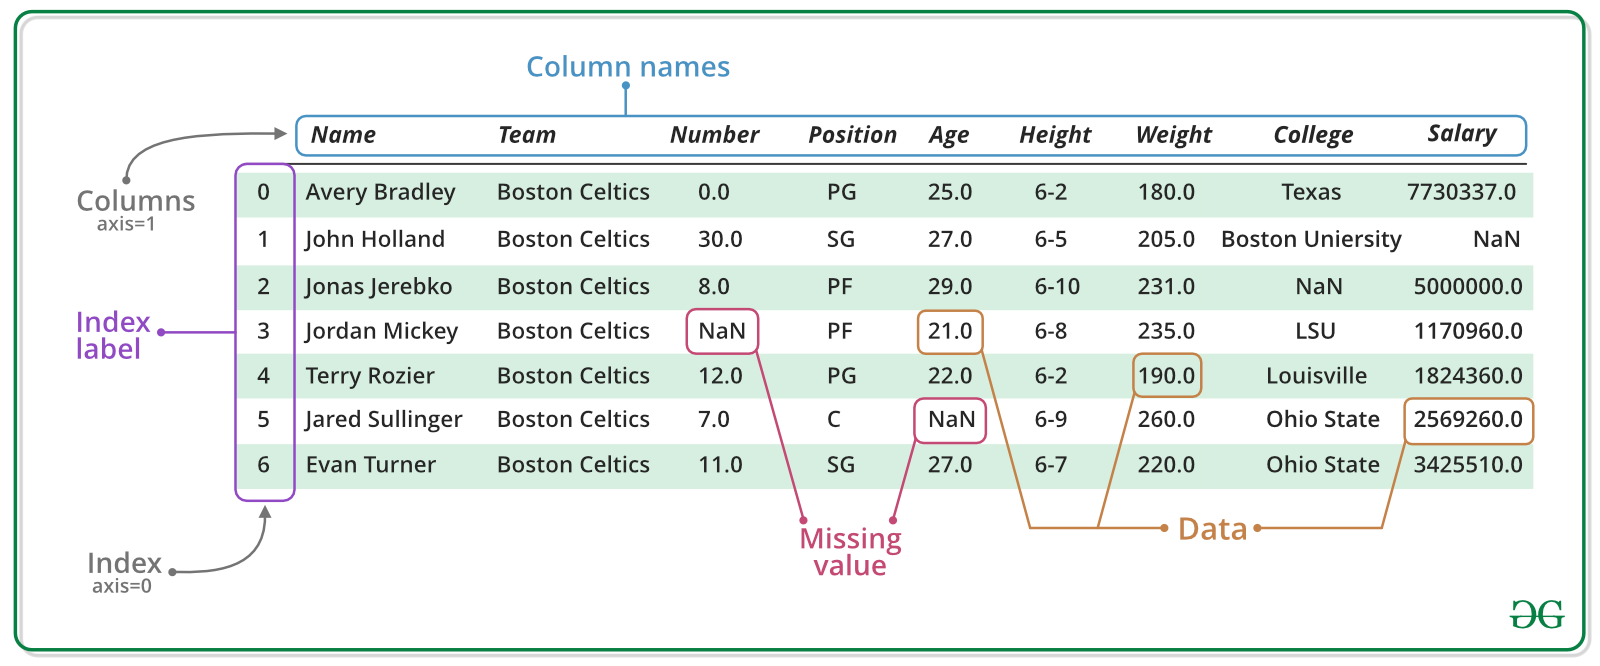

**class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)**

*   data – массив ndarray, словарь (dict) или другой DataFrame;
*   index – список меток для записей (имена строк таблицы);
*   columns – список меток для полей (имена столбцов таблицы);
*   dtype – объект numpy.dtype, определяющий тип данных;
*   copy – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

**DataFrame** можно создать на базе:


*   словаря (dict) в качестве элементов которого должны выступать: одномерные ndarray, списки, другие словари, структуры Series;
*   двумерные ndarray;
*   структуры Series;
*   структурированные ndarray;
*   другие DataFrame.

In [108]:
# cоздание DataFrame из словаря, элементы которого Series
dict_1 = {"price":pd.Series([100, 200, 300], index=['v1', 'v2', 'v3']), "count": pd.Series([15, 27, 4], index=['v1', 'v2', 'v3'])}
df1 = pd.DataFrame(dict_1)
df1

,price,count
v1,100,15
v2,200,27
v3,300,4


In [109]:
# cоздание DataFrame из словаря, элементы которого ndarray
dict_2 = {"price":np.array([100, 200, 300]), "count": np.array([15, 27, 4])}
df2 = pd.DataFrame(dict_2, index=['v1', 'v2', 'v3'])
df2

,price,count
v1,100,15
v2,200,27
v3,300,4


In [110]:
#создание DataFrame из списка, элементами которого являются словари
d3 = [{"price": 100, "count":15}, {"price": 200, "count": 27}]
df3 = pd.DataFrame(d3)
df3

,price,count
0,100,15
1,200,27


In [111]:
#создание DataFrame из двумерного массива
nda1 = np.array([[100, 200, 300], [15, 27, 4]])
df4 = pd.DataFrame(nda1)
print(df4)

     0    1    2
0  100  200  300
1   15   27    4



| Операция| Синтаксис | Возвращаемый результат|
| --- | --- | --- |
| Выбор столбца | df[col] | Series |
| Выбор строки по метке | df.loc[label] | Series |
| Выбор строки по индексу | df.iloc[loc] | Series |
| Срез по строкам | df[0:4] | DataFrame |
| Выбор строк, отвечающих условию | df[bool_vec] | DataFrame |

In [112]:
# Операция: выбор столбца
df1['count']

v1    15
v2    27
v3     4
Name: count, dtype: int64

In [113]:
# Операция: выбор строки по метке
df1.loc['v3']

price    300
count      4
Name: v3, dtype: int64

In [114]:
# Операция: выбор строки по индексу.
df1.iloc[1]

price    200
count     27
Name: v2, dtype: int64

In [115]:
# Операция: срез по строкам
df1[0:2]

,price,count
v1,100,15
v2,200,27


In [116]:
# Операция: выбор строк, отвечающих условию
df1[df1['count'] >= 20]

,price,count
v2,200,27


## Создание DataFrame на основе csv

__Наиболее популярные форматы данных (при скачивании датасета из интернета)__:
* _csv_ (comma separated file), _tsv_ (tab separated file) - таблицы, записанные в текстовые файлы с простой структурой. Эти файлы можно открывать в обычном текстовом редакторе. Pandas позволяет считывать эти данные именно в формате таблицы.
* _xls_ (eXceL Spreadsheet $-$ таблицы Microsoft)
* _json_ (JavaScript Object Notation, используется для _сериализации_ структур языка, то есть сохранения сложных объектов, например, вложенных списков или словарей python). Json-текст представляет собой либо набор пар ключ: значение, либо упорядоченный набор значений
* _txt_ в иной специфичной для задачи форме

В **Pandas** есть функции для считывания во всех этих форматах.

В реальной жизни данные хранятся в базах данных, откуда с помощью sql-подобных языков из них составляют файлы в указанных выше форматах.

__Чтение из csv с помощью pandas__:
[pandas.read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
У функции несколько параметров, основные необходимые:
* filepath_or_buffer (перый и единственный обязательный аргумент) --- имя файла
* sep $-$ разделитель (; , \t ...)
* quotechar $-$ символ кавычек, все что внутри считается за строку (разделители также могут входить в эту строку; ' " ...)
* names $-$ список названий колонок
* header $-$ номер строки файла (с 0), которую нужно считать заголовком
* dtype $-$ словарь, сопоставляющий именам колонок типы данных в них
* na_values $-$ строка/список/словарь (ключи $-$ названия колонок) строковых значений, которые нужно считать пропуском.

По умолчанию names=None и header=0, то есть названия колонок берутся из первой строки файла. Можно передать названия через names. Если вы не хотите давать названия, укажите header=None, тогда названия будут даны автоматически индексами с 0. Учтите, что названия нужны при дальнейшей работе с данными (если вы только не собираетесь взять оттуда только numpy-матрицу; в этом случае они не понадобятся). Следите за длиной списка названий, он должен совпадать с реальным числом колонок в файле (а в противном случае вы получите ошибки)! Чтобы заменить заголовки, записанные в файле, нужно установить header=0 и передать names.

В функцию pd.read\_csv можно передавать как путь к файлу, хранящемуся на компьютере, так и ссылку на файл в Интернете.

Для чтения xls: [pandas.read_excel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

Для чтения sql: [pandas.read_sql](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)

In [163]:
# создание объекта DataFrame на основе CSV-файла
df = pd.read_csv("https://raw.githubusercontent.com/nicknochnack/Pandasin20Minutes/master/telco_churn.csv")

In [164]:
# вывод первых 5 строк
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False


In [165]:
# вывод последних 15 строк
df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126.0,20.13,249.3,97.0,21.19,227.0,56.0,10.22,13.6,3,3.67,5.0,True
3324,WV,159,415,No,No,0,169.8,114.0,28.87,197.7,105.0,16.80,193.7,82.0,8.72,11.6,4,3.13,1.0,False
3325,OH,78,408,No,No,0,193.4,99.0,32.88,116.9,88.0,9.94,243.3,109.0,10.95,9.3,4,2.51,2.0,False
3326,OH,96,415,No,No,0,106.6,128.0,18.12,284.8,87.0,24.21,178.9,92.0,8.05,14.9,7,4.02,1.0,False
3327,SC,79,415,No,No,0,134.7,98.0,22.90,189.7,68.0,16.12,221.4,128.0,9.96,11.8,5,3.19,2.0,False
3328,AZ,192,415,No,Yes,36,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6,2.67,2.0,False
3329,WV,68,415,No,No,0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4,2.59,3.0,False
3330,RI,28,510,No,No,0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6,3.81,2.0,False
3331,CT,184,510,Yes,No,0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10,1.35,2.0,False
3332,TN,74,415,No,Yes,25,234.4,113.0,39.85,265.9,82.0,22.60,241.4,77.0,10.86,13.7,4,3.70,0.0,False


## Просмотр столбцов и типов данных

In [166]:
# получение именов столбцов
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [167]:
# список именов столбцов
df.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [121]:
# просмотр типов столбцов
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls           float64
Total day charge          float64
Total eve minutes         float64
Total eve calls           float64
Total eve charge          float64
Total night minutes       float64
Total night calls         float64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls    float64
Churn                      object
dtype: object

In [122]:
# просмотр статистических данных по каждому столбцу
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3323.000000,3323.000000,3315.000000,3324.000000,3325.000000,3333.000000,3333.000000,3332.000000,3333.000000,3333.000000,3333.000000,3328.000000,3328.000000
mean,101.064806,437.182418,8.099010,179.787150,100.456214,30.557831,201.033935,100.110677,17.083540,200.872037,100.115246,9.039325,10.237294,4.479448,2.764588,1.563101
std,39.822106,42.371290,13.688365,54.419625,20.057356,9.255987,50.676652,19.932115,4.310668,50.573847,19.566710,2.275873,2.791840,2.461214,0.754086,1.315870
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.420000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.500000,114.000000,36.780000,235.325000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**count** - количество ненулевых (пропущенных, NaN) значений в столбце

**mean** - среднее значение

**std** - стандартное отклонение наблюдений

**min** - минимальное значение

**25**% - 25-я процентиль - значение, ниже которого попадают 25% значений переменной

**50**% - 50-я процентиль - значение, ниже которого попадают 50% значений переменной - **МЕДИАНА**

**75**% - 75-я процентиль - значение, ниже которого попадают 75% значений переменной

**max** - максимальное значение

In [123]:
# выводим данные только по столбцам определённого типа
df.describe(include='object')

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3325
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2842


## Фильтрация столбцов

In [124]:
# вывод только 1 столбца State
df.State

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [125]:
# альтернативный метод просмотра нужного столбца
df['State']

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [126]:
df['International plan']

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
3328     No
3329     No
3330     No
3331    Yes
3332     No
Name: International plan, Length: 3333, dtype: object

In [127]:
# просмотр нескольких столбцов
df[['State', 'International plan']]

,State,International plan
0,KS,No
1,OH,No
2,NJ,No
3,OH,Yes
4,OK,Yes
...,...,...
3328,AZ,No
3329,WV,No
3330,RI,No
3331,CT,Yes


In [128]:
# список уникальных значений в столбце Churn
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [129]:
df["State"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [168]:
# .value_counts() вернет количество совпадений всех уникальных значений по заданному индексу без пропусков
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

## Фильтрация по значениям

In [130]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False


In [131]:
# Общее количество строк
len(df)

3333

In [132]:
# оставляем только те ячейки, у которых "International plan" == "No"
df[df['International plan']=='No']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
6,MA,121,510,No,Yes,24,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7,2.03,3.0,NaN
8,LA,117,408,No,No,0,184.5,97.0,31.37,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4,2.35,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,No,No,0,134.7,98.0,22.90,189.7,68.0,16.12,221.4,128.0,9.96,11.8,5,3.19,2.0,False
3328,AZ,192,415,No,Yes,36,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6,2.67,2.0,False
3329,WV,68,415,No,No,0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4,2.59,3.0,False
3330,RI,28,510,No,No,0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6,3.81,2.0,False


In [133]:
# несколько условий фильтрации
df[(df['International plan']=='No') & (df['Churn']==True)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6,3.43,4.0,True
15,NY,161,415,No,No,0,NaN,NaN,NaN,317.8,97.0,27.01,160.6,128.0,7.23,5.4,9,1.46,4.0,True
21,CO,77,408,No,No,0,NaN,NaN,NaN,169.9,121.0,14.44,209.6,64.0,9.43,5.7,6,1.54,5.0,True
33,AZ,12,408,No,No,0,249.6,118.0,NaN,NaN,NaN,21.45,280.2,90.0,12.61,11.8,3,3.19,1.0,True
48,ID,119,415,No,No,0,159.1,114.0,27.05,231.3,117.0,19.66,143.2,91.0,6.44,8.8,3,2.38,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,AR,76,408,No,No,0,107.3,140.0,18.24,238.2,133.0,20.25,271.8,116.0,12.23,10.0,3,2.70,4.0,True
3287,KS,170,415,No,Yes,42,199.5,119.0,33.92,135.0,90.0,11.48,184.6,49.0,8.31,10.9,3,2.94,4.0,True
3301,CA,84,415,No,No,0,280.0,113.0,47.60,202.2,90.0,17.19,156.8,103.0,7.06,10.4,4,2.81,0.0,True
3322,MD,62,408,No,No,0,321.1,105.0,54.59,265.5,122.0,22.57,180.5,72.0,8.12,11.5,2,3.11,4.0,True


## Вывод строк при помощи .iloc

In [134]:
# вывод 20 строку
df.iloc[20]

State                        FL
Account length              147
Area code                   415
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes           NaN
Total day calls             NaN
Total day charge            NaN
Total eve minutes         239.7
Total eve calls            93.0
Total eve charge          20.37
Total night minutes       208.8
Total night calls         133.0
Total night charge          9.4
Total intl minutes         10.6
Total intl calls              4
Total intl charge          2.86
Customer service calls      0.0
Churn                     False
Name: 20, dtype: object

In [135]:
# вывод последней ячейки 20 строки
df.iloc[20,-1]

False

In [136]:
# вывод строк 20-30
df.iloc[20:31]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
20,FL,147,415,No,No,0,NaN,NaN,NaN,239.7,93.0,20.37,208.8,133.0,9.40,10.6,4,2.86,0.0,False
21,CO,77,408,No,No,0,NaN,NaN,NaN,169.9,121.0,14.44,209.6,64.0,9.43,5.7,6,1.54,5.0,True
22,AZ,130,415,No,No,0,183.0,112.0,31.11,72.9,99.0,6.20,181.8,78.0,8.18,9.5,19,2.57,0.0,NaN
23,SC,111,415,No,No,0,110.4,103.0,18.77,137.3,102.0,11.67,189.6,105.0,8.53,7.7,6,2.08,2.0,False
24,VA,132,510,No,No,0,81.1,86.0,13.79,245.2,72.0,20.84,237.0,115.0,10.67,10.3,2,2.78,0.0,False
25,NE,174,415,No,No,0,124.3,76.0,21.13,277.1,112.0,23.55,250.7,115.0,11.28,15.5,5,4.19,3.0,False
26,WY,57,408,No,Yes,39,213.0,115.0,36.21,191.1,112.0,16.24,182.7,115.0,8.22,9.5,3,2.57,0.0,False
27,MT,54,408,No,No,0,134.3,73.0,22.83,155.5,100.0,13.22,102.1,68.0,4.59,14.7,4,3.97,3.0,False
28,MO,20,415,No,No,0,190.0,109.0,32.30,258.2,84.0,21.95,181.5,102.0,8.17,6.3,6,1.70,0.0,False
29,HI,49,510,No,No,0,119.3,117.0,20.28,215.1,109.0,18.28,178.7,90.0,8.04,11.1,1,3.00,1.0,NaN


In [137]:
# Вывод необходимых строк (99) и столбцов (5)
df.iloc[0:100, 0:5]

,State,Account length,Area code,International plan,Voice mail plan
0,KS,128,415,No,Yes
1,OH,107,415,No,Yes
2,NJ,137,415,No,No
3,OH,84,408,Yes,No
4,OK,75,415,Yes,No
...,...,...,...,...,...
95,AK,104,408,No,No
96,MT,73,415,No,No
97,AZ,99,415,No,No
98,MS,120,408,No,No


## Вывод нужных строк при помощи .loc

In [138]:
# копирование dataframe
state = df.copy()
state.set_index('State', inplace=True)

In [139]:
state.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False


In [140]:
# вывод всех строк, где State == "OH"
state.loc['OH']

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
OH,65,408,No,No,0,187.9,116.0,31.94,157.6,117.0,13.40,227.3,86.0,10.23,7.5,6,2.03,1.0,False
OH,83,415,No,No,0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114.0,6.93,15.8,7,4.27,0.0,True
OH,63,415,Yes,Yes,36,199.0,110.0,33.83,291.3,111.0,24.76,197.6,92.0,8.89,11.0,6,2.97,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OH,160,415,No,No,0,206.3,66.0,35.07,241.1,109.0,20.49,227.8,102.0,10.25,11.7,6,3.16,0.0,False
OH,88,408,No,No,0,274.6,105.0,46.68,161.1,121.0,13.69,194.4,123.0,8.75,9.2,4,2.48,2.0,False
OH,106,415,No,Yes,30,220.1,105.0,37.42,222.2,109.0,18.89,158.4,96.0,7.13,13.1,8,3.54,0.0,False


In [141]:
state.loc[['OH', 'AZ']]

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
OH,65,408,No,No,0,187.9,116.0,31.94,157.6,117.0,13.40,227.3,86.0,10.23,7.5,6,2.03,1.0,False
OH,83,415,No,No,0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114.0,6.93,15.8,7,4.27,0.0,True
OH,63,415,Yes,Yes,36,199.0,110.0,33.83,291.3,111.0,24.76,197.6,92.0,8.89,11.0,6,2.97,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,94,415,No,No,0,220.8,111.0,37.54,156.2,67.0,13.28,187.9,89.0,8.46,10.5,4,2.84,2.0,False
AZ,108,415,No,No,0,193.3,126.0,32.86,154.7,85.0,13.15,174.8,98.0,7.87,9.4,6,2.54,3.0,False
AZ,97,408,No,Yes,25,141.0,101.0,23.97,212.0,85.0,18.02,175.2,138.0,7.88,4.9,2,1.32,3.0,False


## Удаление данных

In [142]:
# .isnull() - поиск значений NaN
df.isnull()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
# сумма всех найденных значения NaN
df.isnull().sum()

State                      0
Account length             0
Area code                  0
International plan         0
Voice mail plan            0
Number vmail messages      0
Total day minutes         10
Total day calls           10
Total day charge          18
Total eve minutes          9
Total eve calls            8
Total eve charge           0
Total night minutes        0
Total night calls          1
Total night charge         0
Total intl minutes         0
Total intl calls           0
Total intl charge          5
Customer service calls     5
Churn                      8
dtype: int64

In [144]:
# .dropna удаляем пропущенные значения в серии
df.dropna(inplace=True)

In [145]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Удаление столбцов

In [146]:
# удаляем столбец "Area code"
df.drop('Area code', axis=1)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
3,OH,84,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
4,OK,75,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,No,Yes,36,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6,2.67,2.0,False
3329,WV,68,No,No,0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4,2.59,3.0,False
3330,RI,28,No,No,0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6,3.81,2.0,False
3331,CT,184,Yes,No,0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10,1.35,2.0,False


## Создание столбца с суммой других столбцов

In [147]:
# запись в столбец суммы других столбцов
df['New Column'] = df['Total night minutes'] + df['Total intl minutes']

In [148]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False,254.7
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False,268.1
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False,174.8
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,...,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False,203.5
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False,197.0


## Заполнение столбца данными

In [149]:
# заполнение столбца 100
df['New Column'] = 100

In [150]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False,100
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False,100
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False,100
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,...,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False,100
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False,100


## Изменение содержимого ячейки

In [151]:
# меняем значение конкретной ячейки
df.iloc[0,-1] = 10

In [152]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False,10
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False,100
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False,100
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,...,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False,100
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False,100


## Добавление новой строки

In [156]:
df_new_row = df.copy()
new_row = {'State': "NEW", 'Area code': 0, 'Churn': False}
df_new_row = df_new_row.append(new_row, ignore_index=True)

<ipython-input-156-790e9e1adc29>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_row = df_new_row.append(new_row, ignore_index=True)


In [157]:
df_new_row

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False,10.0
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False,100.0
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False,100.0
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,61.9,...,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False,100.0
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,WV,68.0,415,No,No,0.0,231.1,57.0,39.29,153.4,...,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False,100.0
3304,RI,28.0,510,No,No,0.0,180.8,109.0,30.74,288.8,...,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False,100.0
3305,CT,184.0,510,Yes,No,0.0,213.8,105.0,36.35,159.6,...,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False,100.0
3306,TN,74.0,415,No,Yes,25.0,234.4,113.0,39.85,265.9,...,22.60,241.4,77.0,10.86,13.7,4.0,3.70,0.0,False,100.0


## Удаление строки

In [158]:
df_new_row = df_new_row.drop(df_new_row.shape[0]-1, axis = 0)

In [159]:
df_new_row

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.4,...,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False,10.0
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.5,...,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False,100.0
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.2,...,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False,100.0
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,61.9,...,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False,100.0
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.3,...,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,AZ,192.0,415,No,Yes,36.0,156.2,77.0,26.55,215.5,...,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False,100.0
3303,WV,68.0,415,No,No,0.0,231.1,57.0,39.29,153.4,...,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False,100.0
3304,RI,28.0,510,No,No,0.0,180.8,109.0,30.74,288.8,...,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False,100.0
3305,CT,184.0,510,Yes,No,0.0,213.8,105.0,36.35,159.6,...,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False,100.0


## Создание столбца на основе данных другого столбца

**apply**: применение функции поэлементно к столбцу или строке (+ создание нового столбца, потому что apply возвращает результат и никак не модифицирует dataframe)

In [160]:
# применение лямбда-функции
df['Churn Binary'] = df['Churn'].apply(lambda x: 1 if x==True else 0)

In [161]:
df[df['Churn']==True].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,New Column,Churn Binary
10,IN,65,415,No,No,0,129.1,137.0,21.95,228.5,...,208.8,111.0,9.40,12.7,6,3.43,4.0,True,100,1
41,MD,135,408,Yes,Yes,41,173.1,85.0,29.43,203.9,...,122.2,78.0,5.50,14.6,15,3.94,0.0,True,100,1
48,ID,119,415,No,No,0,159.1,114.0,27.05,231.3,...,143.2,91.0,6.44,8.8,3,2.38,5.0,True,100,1
54,WY,87,415,No,No,0,151.0,83.0,25.67,219.7,...,203.9,127.0,9.18,9.7,3,2.62,5.0,True,100,1
57,CO,121,408,No,Yes,30,198.4,129.0,33.73,75.3,...,181.2,77.0,8.15,5.8,3,1.57,3.0,True,100,1


## Сохранение в CSV

In [162]:
df.to_csv('output.csv')

# Практическая работа

В рамках самостоятельной практической работы предлагается датасет ParisHousingClass. Он содержит информацию о недвижимости в Париже. Поля датасета:

* squareMeters - квадратные метры
* numberOfRooms - количество комнат
* hasYard - имеется ли двор
* hasPool - имеется ли бассейн
* floors - количество этажей
* cityCode - почтовый индекс
* cityPartRange - часть города: чем выше диапазон, тем более престижный район
* numPrevOwners - количество предыдущих владельцев
* made - год постройки
* isNewBuilt - новое ли здание
* hasStormProtector - имеет защиту
* basement - квадратные метры подвала
* attic - квадратные метры мансарды
* garage - размер гаража
* hasStorageRoom - имеет кладовку
* hasGuestRoom - количество гостевых комнат
* price - цена
* category - Luxury или Basic

In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Impuling/datasets/main/ParisHousingClass.csv",
                   sep=",")

In [40]:
data.head()

,square_meters,number_of_rooms,has_yard,has_pool,floors,city_code,city_part_range,num_prev_owners,made,is_new_built,has_storm_protector,basement,attic,garage,has_storage_room,has_guest_room,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## Задание 1
Ознакомиться с представленным набором данных (типы данных, статистики, наличие пропущенных значений)

In [7]:
# Типы данных
data.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [8]:
# Статистические данные по каждому столбцу
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [15]:
# Наличие пропущенных значений
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

## Задание 2
Отсортировать данные в порядке убывания стоимости (Price) и вывести строку с самой высокой ценой и самой низкой.

**Подсказка**: Использовать .sort_values() и .iloc

In [30]:
# Самая высокая и самая низкая цена 
data.sort_values(by='price', ascending = False).iloc[[0, -1]]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
5638,99999,58,0,0,68,10477,3,4,2012,1,1,7631,4199,776,0,2,10006771.2,Basic
4182,89,33,0,0,72,61648,3,4,1995,0,1,3114,1258,264,1,9,10313.5,Basic


## Задание 3

Отфильтровать данные по условию price < 100000

In [31]:
# Фильтрация price < 100000
data[data['price'] < 100000]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
89,600,37,1,0,43,72736,4,7,2011,1,0,6738,5603,866,0,1,63402.1,Basic
227,715,71,0,0,23,33439,7,3,2010,0,1,8609,3736,740,1,8,74252.0,Basic
351,141,16,0,1,58,42248,5,4,1997,1,0,3411,8985,213,0,4,22670.7,Basic
353,533,76,1,1,55,94923,6,8,2021,1,1,654,3585,301,0,9,65465.1,Luxury
446,241,78,0,1,50,86182,7,6,2013,0,1,4070,7336,962,0,7,29643.3,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,636,47,0,1,59,29589,5,3,2001,0,1,4476,2053,899,0,8,73625.1,Basic
9178,864,17,1,0,15,51196,5,2,1999,0,1,2420,9941,427,0,9,89905.9,Basic
9817,460,62,0,0,14,46538,8,5,2016,1,1,3594,706,346,1,4,47967.6,Basic
9911,153,71,0,1,88,99905,3,1,2002,0,1,7704,7896,468,1,8,22499.2,Basic


## Задание 4
Изменить наименование стобцов с CamelCase на snake_case.

**Подсказка**: Snake case — стиль написания составных слов, при котором несколько слов разделяются символом подчеркивания, и не имеют пробелов в записи, причём каждое слово обычно пишется с маленькой буквы. Принят для имен переменных в Python

In [34]:
# snake_case
for column in data.columns:
    new_column_name = ''.join(['_' + c.lower() if c.isupper() else c for c in column]).lstrip('_')
    data.rename(columns={column: new_column_name}, inplace=True)
    
data.head()


,square_meters,number_of_rooms,has_yard,has_pool,floors,city_code,city_part_range,num_prev_owners,made,is_new_built,has_storm_protector,basement,attic,garage,has_storage_room,has_guest_room,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## Задание 5
Посчитать сколько домов было построенно в каждый год

**Подсказка**: Использовать .value_counts()

In [62]:
# Количество домов в каждый год
data['made'].value_counts()

1992    356
2013    352
2020    336
2018    334
2003    332
2001    332
1996    327
1991    324
2009    324
2011    321
2019    321
1993    320
1998    318
1990    317
1994    312
2014    312
2004    307
2016    307
2012    305
2015    305
2021    304
2007    302
2008    302
1997    296
2006    296
2005    296
2000    295
1999    293
2010    291
2002    290
2017    288
1995    285
Name: made, dtype: int64

## Задание 6

Посчитать сколько домов, в которых больше двух комнат?

**Подсказка**: Можно использовать .sum()

In [45]:
# Количество домов, в которых больше двух комнат 
(data['number_of_rooms'] > 2).sum()

9814

## Задание 7
Создать столбец "isOld", который равен 1, если дом построен раньше 2000 года и 0 - иначе.

In [47]:
# Столбец "isOld"
data['isOld'] = data['made'].apply(lambda x: 1 if x < 2000 else 0)

data.head()

,square_meters,number_of_rooms,has_yard,has_pool,floors,city_code,city_part_range,num_prev_owners,made,is_new_built,has_storm_protector,basement,attic,garage,has_storage_room,has_guest_room,price,category,isOld
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury,0
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury,1


## Задание 8

Посчитать какая доля домов класса Luxury имеют двор? А домов класса Basic?

**Подсказка**: Можно использовать .group_by() и .mean()

In [51]:
# Доля домов класса Luxury и Basic с двором
data.groupby('category')['has_yard'].mean().reset_index()

,category,has_yard
0,Basic,0.43755
1,Luxury,1.00000


## Задание 9

Посчитать сколько домов с кладовкой было построено в каждый год

**Подсказка**: Можно использовать .group_by() и .count()

In [53]:
# Количество Домов с кладовкой в разные года
data.groupby('made')['has_storage_room'].count().reset_index()

,made,has_storage_room
0,1990,317
1,1991,324
2,1992,356
3,1993,320
4,1994,312
5,1995,285
6,1996,327
7,1997,296
8,1998,318
9,1999,293


## Задание 10

Посчитать количество домов типа Luxary и Basic в каждой из частей города (cityPartRange)


In [76]:
# Количество домов типа Luxury и Basic в каждой из частей города 
data.groupby(['city_part_range', 'category']).size().unstack(fill_value = 0)

category,Basic,Luxury
city_part_range,,
1,851,143
2,874,116
3,873,126
4,877,124
5,905,126
6,853,112
7,850,134
8,915,120
9,848,149


## Задание 11

Посчитать средние показатели (использовать mean и median) всех полей в разрезе домов типа Luxary и Basic

In [92]:
# Средние показатели домов типа Luxury и Basic
pd.set_option('display.max_columns', None)

data.groupby('category').agg(['mean', 'median'])

square_meters          number_of_rooms        has_yard         \
                  mean   median            mean median     mean median   
category                                                                 
Basic         49999.33 50185.00           50.36  50.00     0.44   0.00   
Luxury        48977.98 49116.00           50.32  49.00     1.00   1.00   

         has_pool        floors        city_code          city_part_range  \
             mean median   mean median      mean   median            mean   
category                                                                    
Basic        0.42   0.00  50.32  50.00  50181.89 50715.00            5.51   
Luxury       1.00   1.00  49.99  49.00  50526.53 50419.00            5.49   

                num_prev_owners           made         is_new_built         \
         median            mean median    mean  median         mean median   
category                                                                     
Basic      5.00            5.54   6.00 2005.47 2005.00         0.43   0.00   
Luxury     5.00            5.43   5.00 2005.62 2006.00         1.00   1.00   

         has_storm_protector        basement           attic         garage  \
                        mean median     mean  median    mean  median   mean   
category                                                                      
Basic                   0.50   0.00  5045.48 5121.00 5034.32 5044.00 553.34   
Luxury                  0.50   1.00  4947.61 4916.00 4984.44 5070.00 551.59   

                has_storage_room        has_guest_room             price  \
         median             mean median           mean median       mean   
category                                                                   
Basic    556.00             0.50   1.00           4.99   5.00 5005929.16   
Luxury   543.00             0.51   1.00           5.02   5.00 4907260.14   

                    isOld         
             median  mean median  
category                          
Basic    5023160.60  0.31   0.00  
Luxury   4923159.30  0.32   0.00

## Задание 12
Посчитать медианные цены в разрезе года постройки и типа (Luxary и Basic)

**Подсказка**: Можно использовать .pivot_table()



In [94]:
# Медианные цены в разрезе года постройки
pd.set_option('display.max_rows', None)

data.pivot_table(index = ['made', 'category'], values = 'price', aggfunc = 'median')

price
made category           
1990 Basic    5245390.50
     Luxury   5414753.00
1991 Basic    4383514.60
     Luxury   3692373.60
1992 Basic    5641537.20
     Luxury   4322399.20
1993 Basic    5176042.30
     Luxury   4375504.30
1994 Basic    4427415.90
     Luxury   5499950.90
1995 Basic    4846148.00
     Luxury   5796496.50
1996 Basic    5071389.60
     Luxury   4624665.60
1997 Basic    4765299.70
     Luxury   5865688.70
1998 Basic    4591601.80
     Luxury   4183656.30
1999 Basic    5231239.90
     Luxury   5775100.90
2000 Basic    5139098.00
     Luxury   4888333.00
2001 Basic    5401835.10
     Luxury   3163533.10
2002 Basic    5110265.20
     Luxury   4582034.20
2003 Basic    4986598.80
     Luxury   3845232.30
2004 Basic    5305758.40
     Luxury   4216631.40
2005 Basic    5025455.00
     Luxury   5241253.00
2006 Basic    5839249.60
     Luxury   5280977.10
2007 Basic    5497143.20
     Luxury   5311032.20
2008 Basic    4674140.80
     Luxury   4611619.80
2009 Basic    4981418.40
     Luxury   4954324.90
2010 Basic    4869663.00
     Luxury   5995883.00
2011 Basic    5456741.10
     Luxury   5016654.60
2012 Basic    5131469.70
     Luxury   4121602.20
2013 Basic    4544221.80
     Luxury   6310710.80
2014 Basic    4896924.40
     Luxury   4454557.90
2015 Basic    5027663.50
     Luxury   5385263.50
2016 Basic    5067362.60
     Luxury   4505533.10
2017 Basic    4910032.20
     Luxury   4772237.20
2018 Basic    5037010.80
     Luxury   4524603.30
2019 Basic    4773949.90
     Luxury   4580938.90
2020 Basic    4943342.00
     Luxury   4943111.00
2021 Basic    5168477.60
     Luxury   5416115.10